# Example axle calculation

Illustrate the creation of an axle calculation report. The formula's are mostly based on **Roloff/Matek - Maschinelemente** which can be found here (Springer link)[http://link.springer.com/book/10.1007%2F978-3-658-09082-1]

In [1]:
import matplotlib.pyplot as pl
%matplotlib inline
from IPython.display import display, Latex, Math
from pymech.units.SI import ureg, Q_

import pymech.fmt as fmt
from pymech.materials.Steel import Steel
from pymech.materials.ApplianceFactor import ApplianceFactor, Bumps
from pymech.axle.Properties import Properties
from pymech.axle.Axle import Axle

In [2]:
prop = Properties()
prop.geometry = fmt.Geometry(1000)
prop.geometry.addpoint(fmt.Point(100, known=False))
prop.geometry.addpoint(fmt.Point(500, f=500.))
prop.geometry.addweight(fmt.Point(600), fmt.Point(800), 20.)
prop.geometry.addpoint(fmt.Point(950, known=False))                     

prop.material = Steel()
prop.material.load(filename='pymech/resources/materials/S235JR.mat')
prop.appliancefactor = ApplianceFactor(drivingmachine=Bumps.NO_BUMPS, machine=Bumps.LIGHT_BUMPS)

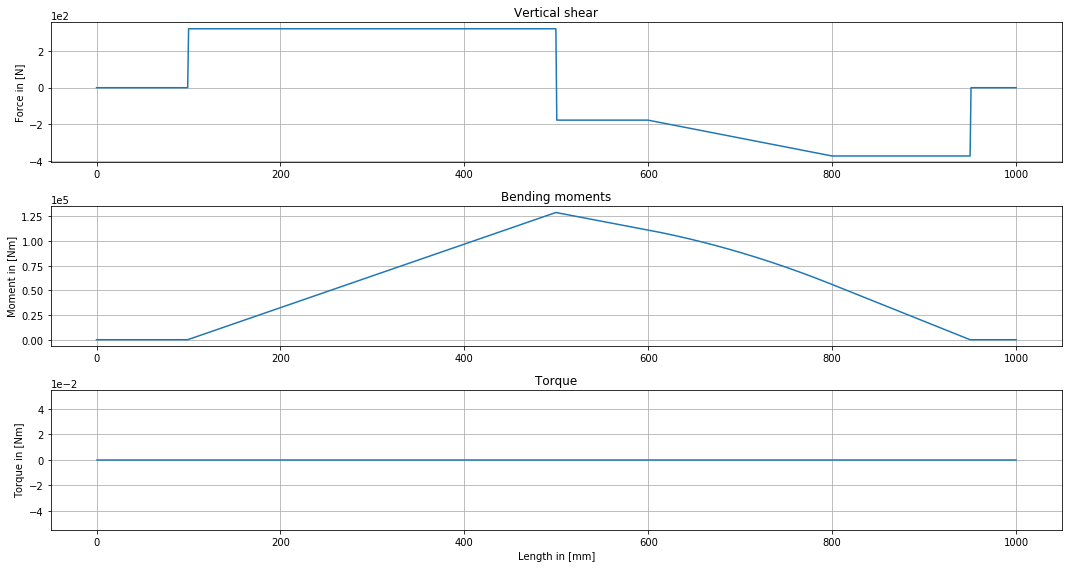

In [3]:
axle = Axle(properties=prop)
axle.solvegeometry()
axle.plotfmt(figsize=(15,8))

In [4]:
d_prime = axle.d_prime(pretty=True)
d_prime[1]

<IPython.core.display.Latex object>

In [5]:
k = 0.5
d_a = axle.d_a(k=k, pretty=True)
d_a[1]

<IPython.core.display.Latex object>

In [6]:
sigma_v = axle.properties.material.sigma_v(pretty=True)
sigma_v[1]

<IPython.core.display.Latex object>